# Titanic - Machine Learning from Disaster

## Project Overview
This project aims to predict the survival outcome of passengers on the Titanic using various machine learning models. We analyze the Titanic dataset, preprocess the data, and test several classification algorithms to find the most accurate predictor of passenger survival.

## Importing Necessary Libraries
In this cell, we import essential libraries for data analysis, visualization, and model development. Key libraries include:
- **Pandas** and **NumPy** for data manipulation.
- **Matplotlib** and **Seaborn** for data visualization.
- **Scikit-Learn** tools for data preprocessing, model selection, feature engineering, and evaluation.
- Additional classifiers from **XGBoost** and **LightGBM** for advanced ensemble modeling.

The `%matplotlib inline` command is used to render plots inline within the notebook for easy visualization.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn. preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier


from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


%matplotlib inline


## Explore Data

We start by loading the Titanic training and test datasets into Pandas DataFrames. These datasets contain information about Titanic passengers, such as age, gender, class, and fare, which we will use to build models predicting survival rates.

In [ ]:
# Read train and test dataset
data_path = '/content/drive/MyDrive/Colab Notebooks/Titanic'
train_df = pd.read_csv(data_path + '/train.csv')
test_df = pd.read_csv(data_path + '/test.csv')

In [ ]:
print('Train dataset shape: ', train_df.shape)
print('Test dataset shape: ', test_df.shape)
train_df.head()

Train dataset shape:  (891, 12)
Test dataset shape:  (418, 11)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


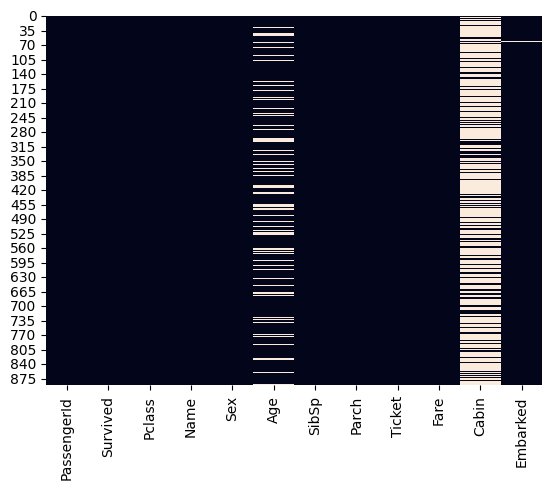

In [ ]:
# Generate plot to show missing value

sns.heatmap(train_df.isnull(),cbar=False)
plt.show()

### Statistical Summary of Numerical Features
This cell generates summary statistics for numerical features in the Titanic dataset, including Age, SibSp (siblings/spouses aboard), Parch (parents/children aboard), and Fare. This statistical overview provides insights into each column's central tendencies and variations, which can guide data cleaning and feature engineering steps.

In [ ]:
train_df[['Age','SibSp', 'Parch', 'Fare']].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


### Statistical Summary of Categorical Features
Here, we display descriptive statistics for categorical features, including Name, Sex, Ticket, Cabin, and Embarked. The summary provides counts, unique values, and most frequent entries, helping identify potential preprocessing needs for categorical data (e.g., encoding or handling missing values).

In [ ]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [ ]:
# The value of survived and unsirvived
train_df['Survived'].value_counts()

,count
Survived,
0,549
1,342


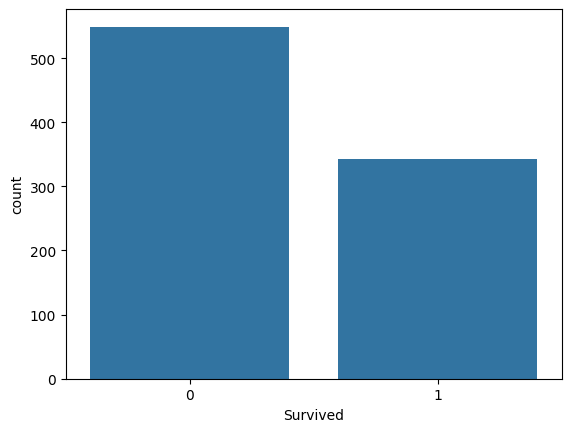

In [ ]:
# count plot The value of survived and unsirvived
sns.countplot(x='Survived', data=train_df)
plt.show()


In [ ]:
#group by Pclass  anf create the percentage of survived

pclass_survival_rate = train_df[['Pclass' ,'Survived']].groupby('Pclass').mean().sort_values(by='Survived', ascending=False).round(2)
pclass_survival_rate

,Survived
Pclass,
1,0.63
2,0.47
3,0.24


In [ ]:
sex_survival_rate = train_df[['Sex' ,'Survived']].groupby('Sex').mean().sort_values(by='Survived', ascending=False).round(2)
sex_survival_rate


,Survived
Sex,
female,0.74
male,0.19


In [ ]:
SibSp_survival_rate = train_df[['SibSp' ,'Survived']].groupby('SibSp').mean().sort_values(by='Survived', ascending=False).round(2)
SibSp_survival_rate

,Survived
SibSp,
1,0.54
2,0.46
0,0.35
3,0.25
4,0.17
5,0.00
8,0.00


In [ ]:
Parch_survival_rate = train_df[['Parch' ,'Survived']].groupby('Parch').mean().sort_values(by='Survived', ascending=False).round(2)
Parch_survival_rate

,Survived
Parch,
3,0.60
1,0.55
2,0.50
0,0.34
5,0.20
4,0.00
6,0.00


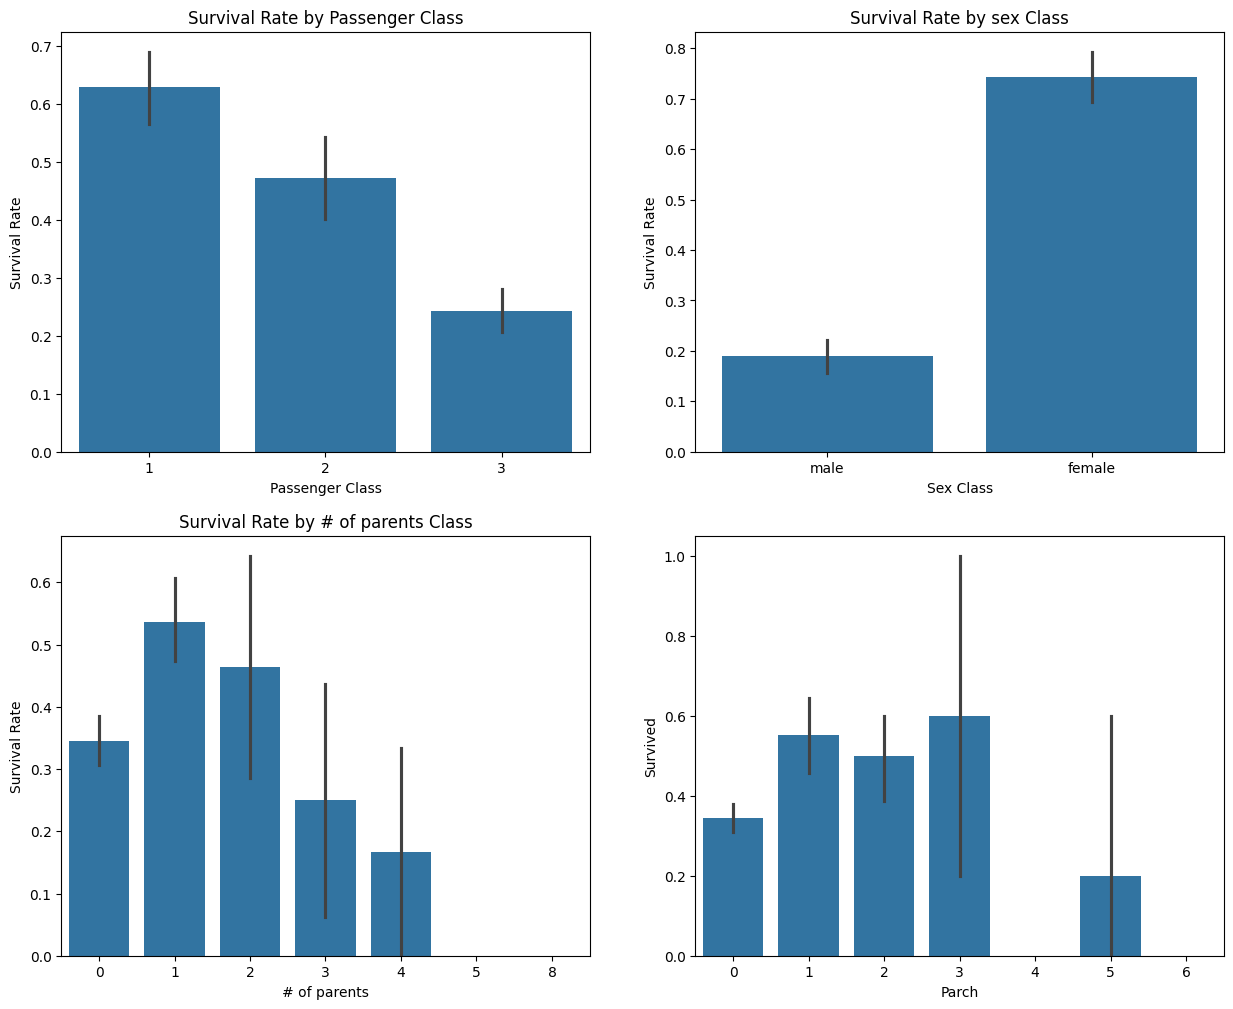

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15,12))

sns.barplot(x='Pclass', y='Survived', data=train_df, ax=axes[0,0])
axes[0,0].set_title('Survival Rate by Passenger Class')
axes[0,0].set_xlabel('Passenger Class')
axes[0,0].set_ylabel('Survival Rate')

sns.barplot(x='Sex', y='Survived', data=train_df, ax=axes[0,1])
axes[0,1].set_title('Survival Rate by sex Class')
axes[0,1].set_xlabel('Sex Class')
axes[0,1].set_ylabel('Survival Rate')

sns.barplot(x='SibSp', y='Survived', data=train_df, ax=axes[1,0])
axes[1,0].set_title('Survival Rate by # of siblings Class')
axes[1,0].set_xlabel('# of siblings')
axes[1,0].set_ylabel('Survival Rate')

sns.barplot(x='Parch', y='Survived', data=train_df, ax=axes[1,1])
axes[1,0].set_title('Survival Rate by # of parents Class')
axes[1,0].set_xlabel('# of parents')
axes[1,0].set_ylabel('Survival Rate')

plt.show()

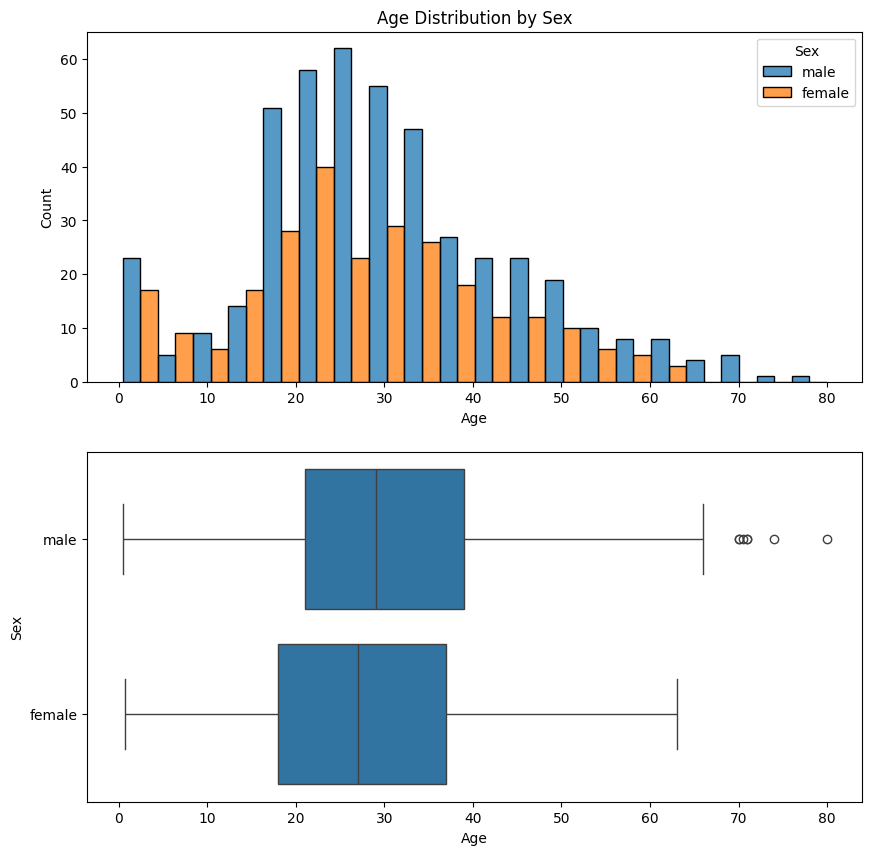

In [ ]:
# prompt: generate hist plot og age seperated by sex from sns

fig, axes = plt.subplots(2, 1, figsize=(10,10))
sns.histplot(data=train_df, x='Age', hue = 'Sex', ax=axes[0],multiple='dodge')
axes[0].set_title('Age Distribution by Sex')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Count')

sns.boxplot(x='Age', y = 'Sex', data=train_df, ax=axes[1])
axes[1].set_xlabel('Age')
plt.show()

## Data Processing

## Handling Missing Values
In this cell, we address missing values within the dataset. Handling missing data is crucial for accurate model performance, as certain machine learning models cannot process null values. The following strategy might be employed:
1. **Numerical Columns**: Fill missing values with the median or mean, depending on the distribution.
2. **Categorical Columns**: Replace missing values with the most frequent category or a placeholder, depending on the context and importance of the column.

---

## Encoding Categorical Variables
Machine learning models require numerical input, so we convert categorical features into a numerical format using **One-Hot Encoding**. This process creates binary columns for each category, allowing us to retain the information without assigning arbitrary numeric labels. For example, `Sex` and `Embarked` columns, containing categorical data, are encoded into binary format.

---

## Data Scaling and Transformation
In this step, we apply **Standard Scaling** to normalize numerical features. Standardization ensures that each feature contributes equally to the model, especially when features have varying ranges. We use `StandardScaler` from Scikit-Learn, which scales the data to have a mean of 0 and a standard deviation of 1, which is particularly beneficial for algorithms sensitive to feature scales.


In [ ]:
ohe_features = [
    "Sex",
    "Cabin",
    "Embarked",
]

num_features = [
    "Pclass",
    "Age",
    "Parch",
    "SibSp",
    "Fare",
]

mixed_df = train_df[ohe_features + num_features]
target = train_df["Survived"]
print(mixed_df.shape)


(891, 8)


In [ ]:
dev_X, test_X, dev_y, test_y = train_test_split(mixed_df, target, test_size=0.2, random_state=42)

numeric_transformer = make_pipeline(
    SimpleImputer(strategy='mean'),
    StandardScaler()
)

categorical_transformer = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(handle_unknown='ignore')
)

preprocessor = make_column_transformer(
    (numeric_transformer, num_features),
    (categorical_transformer, ohe_features)
)


## Model Selection and Training
We begin by training various machine learning models to predict passenger survival. Models tested include:
- **Logistic Regression**: A linear model useful for binary classification tasks like survival prediction.
- **Decision Tree**: A non-linear model that splits the data into segments based on feature values, forming a tree structure.
- **Random Forest**: An ensemble model that aggregates multiple decision trees for more stable and accurate predictions.
- **Gradient Boosting** and **AdaBoost**: Boosting algorithms that improve model performance by focusing on misclassified samples in sequentially built models.
- **XGBoost** and **LightGBM**: Gradient boosting algorithms known for their efficiency and accuracy, especially with large datasets.

Each model is initialized with default parameters initially and will later be fine-tuned for optimal performance.

---

## Model Evaluation Using Cross-Validation
We employ **cross-validation** to evaluate each model's performance. Cross-validation divides the data into multiple folds, training on some folds and testing on others, which reduces the likelihood of overfitting and gives a more accurate assessment of model performance. The **accuracy** of each model is computed across folds to identify the best-performing algorithms.

---

## Hyperparameter Tuning with GridSearchCV
To optimize each model, we use **GridSearchCV**, which systematically tests different hyperparameter combinations to find the best settings for model accuracy. For example, in Random Forest, parameters such as the number of trees and depth of each tree are tuned. Grid search improves model performance by finding the optimal configuration for each model.


## Logistic Regression

In [ ]:
pipe = make_pipeline(preprocessor, LogisticRegression(solver = 'liblinear'))
scores = cross_val_score(pipe, dev_X, dev_y, cv=10,)
print(scores)
print(np.mean(scores))

[0.84722222 0.79166667 0.70422535 0.90140845 0.84507042 0.73239437
 0.76056338 0.71830986 0.77464789 0.85915493]
0.7934663536776213


## Logistic Regression - hyperparameter tuning

In [ ]:
pipe = make_pipeline(preprocessor,
                     GridSearchCV(LogisticRegression(),
                                  param_grid = [{"solver":["liblinear"],
                                                 "C":np.logspace(-3, 3, 10)}],
                                  return_train_score=True))

pipe.fit(dev_X, dev_y)
grid_search_results = pipe.named_steps["gridsearchcv"]
print(f'Best score:', grid_search_results.best_score_)
print(f'Best alpha:', grid_search_results.best_params_)
print(f"Test score:", pipe.score(test_X, test_y))


val_performance = {}
train_performance = {}
val_performance['Logistic Regression'] = grid_search_results.best_score_
train_performance['Logistic Regression'] = pipe.score(test_X, test_y)

Best score: 0.7962966610853934
Best alpha: {'C': 0.021544346900318832, 'solver': 'liblinear'}
Test score: 0.8212290502793296


## Elastic Net Logistic Regression

In [ ]:
pipe = make_pipeline(preprocessor, LogisticRegression('elasticnet', C=0.1, solver= 'saga', l1_ratio=0.5))
scores = cross_val_score(pipe, dev_X, dev_y, cv=10, error_score="raise")
print(scores)
print(np.mean(scores))

[0.83333333 0.77777778 0.71830986 0.92957746 0.83098592 0.71830986
 0.77464789 0.71830986 0.76056338 0.90140845]
0.7963223787167449


## Elastic Net Logistic Regression - hyperparameter tuning

In [ ]:
pipe = make_pipeline(preprocessor,
                     GridSearchCV(LogisticRegression(max_iter=10000),
                                  param_grid = [{"penalty":['elasticnet'],
                                                 "solver":["saga"],
                                                 "C":np.logspace(-3, 3, 10),
                                                "l1_ratio": np.linspace(0, 1, 10)}],
                                  return_train_score=True))

pipe.fit(dev_X, dev_y)
grid_search_results = pipe.named_steps["gridsearchcv"]
print(f'Best score:', grid_search_results.best_score_)
print(f'Best alpha:', grid_search_results.best_params_)
print(f"Test score:", pipe.score(test_X, test_y))


val_performance['Elastic Net Logistic Regression'] = grid_search_results.best_score_
train_performance['Elastic Net Logistic Regression'] = pipe.score(test_X, test_y)

Best score: 0.8047375160051218
Best alpha: {'C': 0.021544346900318832, 'l1_ratio': 0.1111111111111111, 'penalty': 'elasticnet', 'solver': 'saga'}
Test score: 0.8268156424581006


## Decision Tree Early Stopping - Maximum Depth

In [ ]:
pipe = make_pipeline(preprocessor,
                    GridSearchCV(DecisionTreeClassifier(random_state=82),
                                 param_grid={'max_depth': np.arange(1,10)},
                                 return_train_score=True))
pipe.fit(dev_X, dev_y)
grid_search_result = pipe.named_steps['gridsearchcv']
print(f'Best Score: {grid_search_result.best_score_}')
print(f'Best alpha: {grid_search_result.best_params_}')
print(f'Test Score: {pipe.score(test_X, test_y)}')


val_performance['Decision Tree'] = grid_search_result.best_score_
train_performance['Decision Tree'] = pipe.score(test_X, test_y)

Best Score: 0.8215896779277061
Best alpha: {'max_depth': 3}
Test Score: 0.7988826815642458


## Decision Tree - Feature Importance

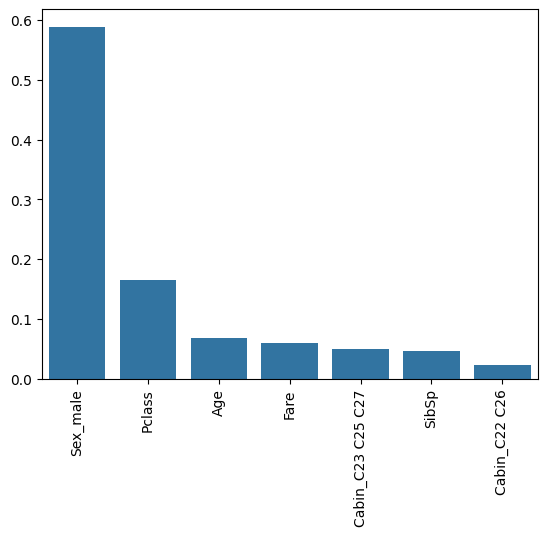

In [ ]:
best_tree = grid_search_result.best_estimator_
ohe_feature_names = preprocessor.transformers_[1][1].get_feature_names_out().tolist()
feature_names = num_features + ohe_feature_names
feat_imps = zip(feature_names, best_tree.feature_importances_)
feats, imps = zip(*(sorted(list(filter(lambda x: x[1] != 0, feat_imps)), key=lambda x: x[1], reverse=True)))
ax = sns.barplot(x=list(feats), y=list(imps))
ax.tick_params(axis='x', rotation=90)

## Random Forests

In [ ]:
pipe_rf = make_pipeline(preprocessor, RandomForestClassifier(random_state=100))
pipe_rf.fit(dev_X, dev_y)
print(pipe_rf.score(dev_X, dev_y))
print(pipe_rf.score(test_X, test_y))

0.9845505617977528
0.7877094972067039


## Random Forests - Hyperparameter tuning

In [ ]:
n_estimators = [100, 200, 300, 400, 500, 600, 700]
oob_score=[]
train_score=[]
test_score=[]

for eatimator in n_estimators:
    pipe_rf = make_pipeline(preprocessor, RandomForestClassifier(n_estimators=eatimator,
                                                              random_state=100,oob_score=True))
    pipe_rf.fit(dev_X, dev_y)
    train_score.append(pipe_rf.score(dev_X, dev_y))
    test_score.append(pipe_rf.score(test_X, test_y))
    rt = pipe_rf.named_steps['randomforestclassifier']
    oob_score.append(rt.oob_score_)

best_index = np.argmax(oob_score)
best_n_estimator = n_estimators[best_index]
best_pipe_rf = make_pipeline(preprocessor, RandomForestClassifier(n_estimators=best_n_estimator,
                                                              random_state=100,oob_score=True))
best_pipe_rf.fit(dev_X,dev_y)
print(f'Randorn Forest Regressor score: {best_pipe_rf.score(test_X, test_y)}, # of estimate rs:{best_n_estimator}')

val_performance['Random Forest'] = oob_score[best_index]
train_performance['Random Forest'] = best_pipe_rf.score(test_X, test_y)

Randorn Forest Regressor score: 0.7988826815642458, # of estimate rs:300


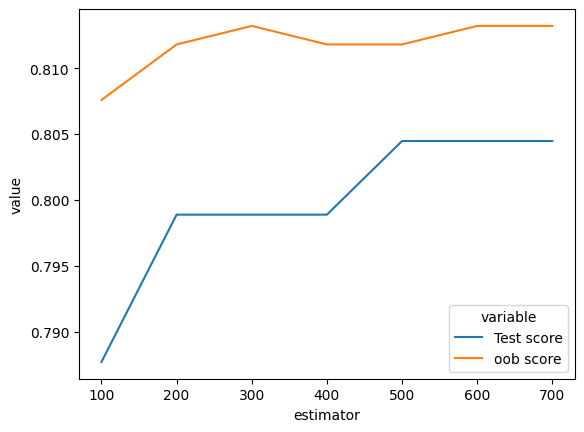

In [ ]:
df = pd.DataFrame({'estimator':n_estimators, 'Test score':test_score, 'oob score':oob_score})

sns.lineplot(x='estimator', y='value', hue='variable',
             data=pd.melt(df, ['estimator']))
plt.show()

## Random Forests - Feature importances

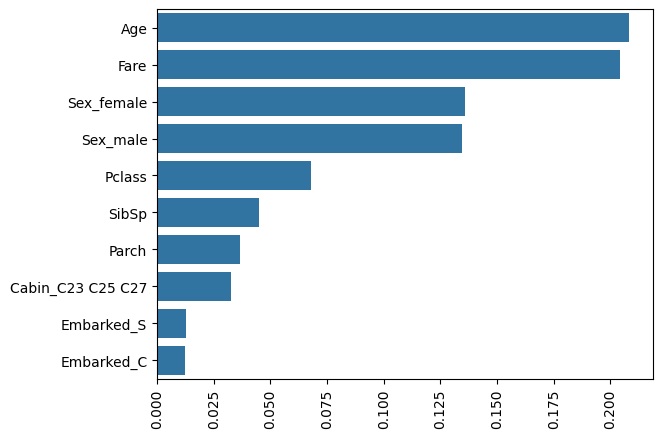

In [ ]:
rf = best_pipe_rf.named_steps['randomforestclassifier']
ohe_feature_names = preprocessor.transformers_[1][1].get_feature_names_out().tolist()
feature_names = num_features + ohe_feature_names
feat_imps = zip(feature_names, rf.feature_importances_)
feats, imps = zip(*(sorted(list(filter(lambda x: x[1] != 0, feat_imps)), key=lambda x: x[1], reverse=True)))
ax = sns.barplot(y=list(feats[:10]), x=list(imps[:10]))
ax.tick_params(axis='x', rotation=90)

## Adaboost

In [ ]:
pipe_ab = make_pipeline(preprocessor, AdaBoostClassifier(random_state=42))
pipe_ab.fit(dev_X, dev_y)
print(f'AdaBoost Regression score: {pipe_ab.score(test_X, test_y)}')

AdaBoost Regression score: 0.8100558659217877


## Adaboost Classifier - hyperparameter tuning

In [ ]:
pipe = make_pipeline(preprocessor, GridSearchCV(estimator=AdaBoostClassifier(),
                                              param_grid={'n_estimators':[50, 100, 200],
                                                          'learning_rate':np.logspace(-3,0,4)}))
pipe.fit(dev_X, dev_y)
grid_search_result = pipe.named_steps['gridsearchcv']
print(f'Best score: {grid_search_result.best_score_}')
print(f'Best alpha: {grid_search_result.best_params_}')
print(f'Test score: {pipe.score(test_X, test_y)}')

val_performance['AdaBoost'] = grid_search_result.best_score_
train_performance['AdaBoost'] = pipe.score(test_X, test_y)

Best score: 0.806175514626219
Best alpha: {'learning_rate': 0.1, 'n_estimators': 200}
Test score: 0.7988826815642458


## GradientBoostingClassifier

In [ ]:
pipe_gbr = make_pipeline(preprocessor, GradientBoostingClassifier(random_state=42))
pipe_gbr.fit(dev_X, dev_y)
print(f'Gradient Boosting Regrassion score: {pipe_gbr.score(test_X, test_y)}')

Gradient Boosting Regrassion score: 0.7988826815642458


In [ ]:
pipe = make_pipeline(preprocessor, GridSearchCV(estimator=GradientBoostingClassifier(),
                                              param_grid={'n_estimators':[50, 100, 200, 300, 400, 500],
                                                          'learning_rate':np.logspace(-3,0,4)}))
pipe.fit(dev_X, dev_y)
grid_search_result = pipe.named_steps['gridsearchcv']
print(f'Best score: {grid_search_result.best_score_}')
print(f'Best alpha: {grid_search_result.best_params_}')
print(f'Test score: {pipe.score(test_X, test_y)}')

val_performance['GradientBoostingClassifier'] = grid_search_result.best_score_
train_performance['GradientBoostingClassifier'] = pipe.score(test_X, test_y)

Best score: 0.8426967398798384
Best alpha: {'learning_rate': 0.1, 'n_estimators': 300}
Test score: 0.8100558659217877


## XGBoost

In [ ]:
pipe_xg = make_pipeline(preprocessor, XGBClassifier(random_state=42))
pipe_xg.fit(dev_X, dev_y)
print(f'XGBoost Regressor score: {pipe_xg.score(test_X, test_y)}')

XGBoost Regressor score: 0.8044692737430168


In [ ]:
pipe = make_pipeline(preprocessor, GridSearchCV(estimator=XGBClassifier(),
                                              param_grid={'n_estimators':[50, 100, 200, 300, 400, 500, 600],
                                                          'learning_rate':np.logspace(-3,0,4)}))
pipe.fit(dev_X, dev_y)
grid_search_result = pipe.named_steps['gridsearchcv']
print(f'Best score: {grid_search_result.best_score_}')
print(f'Best alpha: {grid_search_result.best_params_}')
print(f'Test score: {pipe.score(test_X, test_y)}')

val_performance['XGBoost'] = grid_search_result.best_score_
train_performance['XGBoost'] = pipe.score(test_X, test_y)

Best score: 0.8272825765783512
Best alpha: {'learning_rate': 0.01, 'n_estimators': 500}
Test score: 0.8379888268156425


## Model Comparison and Selection
After evaluating and tuning each model, we compare their performances based on accuracy scores and computational efficiency. The model with the best combination of accuracy and efficiency will be selected as the final model for predicting Titanic survival.


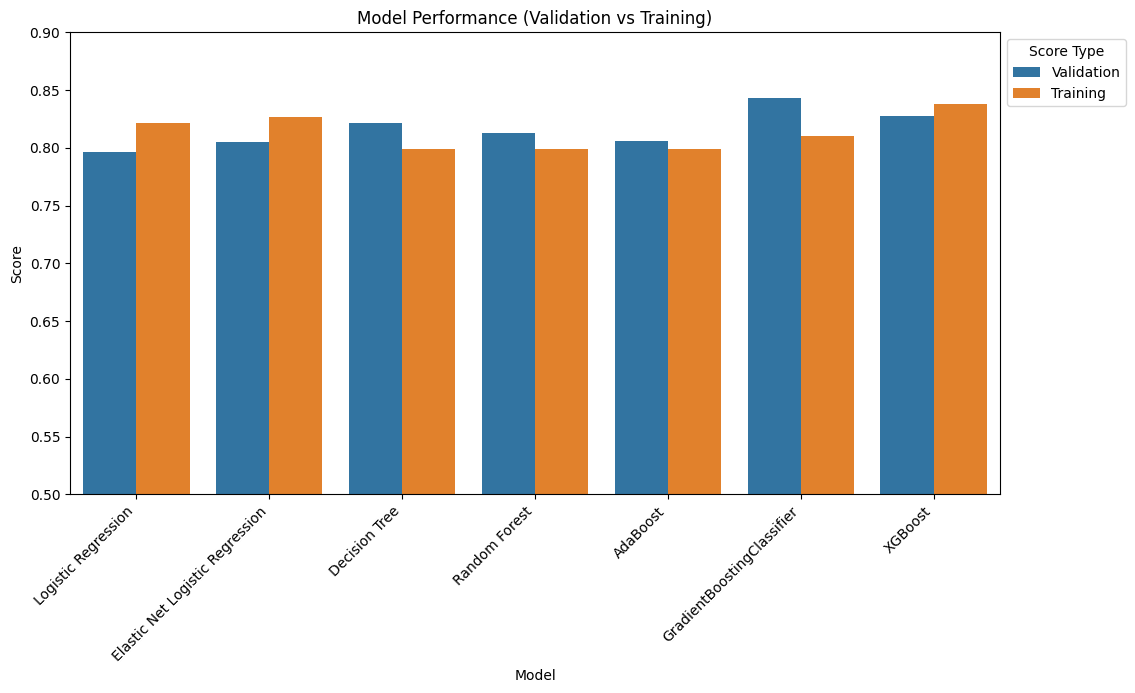

In [ ]:
models = list(val_performance.keys())
performacne_df = pd.DataFrame({
    'Model': models * 2,
    'Score': list(val_performance.values()) + list(train_performance.values()),
    'Type': ['Validation'] * len(val_performance) + ['Training'] * len(train_performance)
})

plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Score', hue='Type', data=performacne_df)
plt.xticks(rotation=45, ha='right')
plt.title('Model Performance (Validation vs Training)')
plt.xlabel('Model')
plt.ylabel('Score')
plt.ylim(0.5, 0.9)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title="Score Type")
plt.show()


## Final Model Testing
Using the best model from the previous step, we test its performance on the held-out test set. This final evaluation provides an unbiased assessment of the model's generalization ability on unseen data, representing how well the model might perform in a real-world scenario.



In [ ]:
ohe_features = [
    "Sex",
    "Cabin",
    "Embarked",
]

num_features = [
    "Pclass",
    "Age",
    "Parch",
    "SibSp",
    "Fare",
]

mixed_df = train_df[ohe_features + num_features]
target = train_df["Survived"]
print(mixed_df.shape)

X_test = test_df[ohe_features + num_features]

(891, 8)


In [ ]:
pipe_xg = make_pipeline(preprocessor, XGBClassifier(n_estimators=500))
pipe_xg.fit(mixed_df, target)


predictions = pipe_xg.predict(X_test)

output = pd.DataFrame({'PassengerId': test_df.PassengerId, 'Survived': predictions})
output.to_csv(data_path + '/submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [ ]:
pipe_elas = make_pipeline(preprocessor, LogisticRegression('elasticnet', C=0.021544346900318832, solver= 'saga', l1_ratio=0.1111111111111111))

pipe_elas.fit(mixed_df, target)


predictions = pipe_elas.predict(X_test)

output = pd.DataFrame({'PassengerId': test_df.PassengerId, 'Survived': predictions})
output.to_csv(data_path + '/submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


---

## Conclusion
This project demonstrates a complete machine learning workflow for binary classification on the Titanic dataset. From data preprocessing to feature selection, model training, and evaluation, we applied various techniques to predict passenger survival with high accuracy. The final model could be further improved by incorporating more complex feature engineering or testing additional algorithms.